In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt

In [ ]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.0), requires_grad=True)

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        return F.relu(input_to_final_relu)

In [30]:
model = BasicNN()

In [35]:
inputs = torch.tensor([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
labels = torch.tensor([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])

optimizer = SGD(model.parameters(), lr=0.1)
total_loss = 0.0
for epoch in range(100):
    total_loss = 0
    for i in range(len(inputs)):
        input_i = inputs[i]
        label_i = labels[i]
        output_i = model(input_i)
        loss = (label_i - output_i) ** 2
        loss.backward()
        total_loss += float(loss)
    
    if total_loss < 0.0001:
        print("Num steps: ", epoch)
        print("Total loss: ", total_loss, "\n======")
        break
    
    optimizer.step()
    optimizer.zero_grad()
    print("Step: ", epoch)
    print("Total loss: ", total_loss)
    print("Bias value: ", model.final_bias.data, "\n======") 

Num steps:  0
Total loss:  1.4551915228366852e-11 


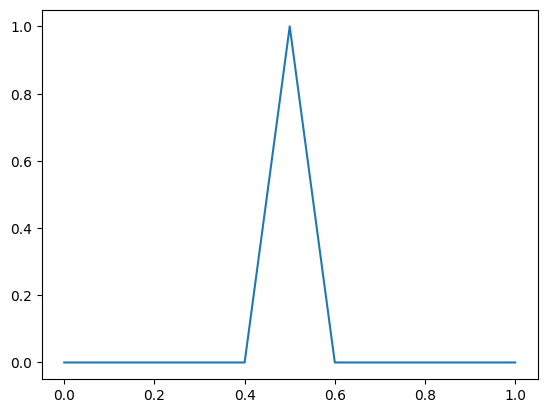

In [36]:
final_outputs = model(inputs)
plt.plot(inputs, final_outputs.detach())